### Logistic Regression is a classifier. It adds probability to a prediction. 
* Review: SVM is used to make predictions of continuous values
    - it cannot tell us the probability of a given category.

# Logistic Regression 

- Is a classifier

- How is it different from SVM?

    - SVM **can not** tell us how probable I am healthy. 
    - For example, if my Serotonin is 3 and my Dopamine is 6, what is the chance that I would be considered as healthy
   90 percent or 60 percent or etc.
    
- Logistic Regression can do it

## Watch a video about Logistic Regression

Lets watch this video: https://www.youtube.com/watch?v=yIYKR4sgzI8

## The Dataset We use for Logistic Regression

- Pima Indian Diabetes

- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset

- In particular, all patients here are females at least 21 years old of Pima Indian heritage

- Labels: 1: diabetes, 0: no diabetes

## Activity: Obtain confusion matrix, accuracy, precision, recall for pima Diabetes dataset

Steps:

1- Load the dataset: `pd.read_csv('diabetes.csv')`

2- Use these features: `feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']`

3- Split the data to train and test: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

4- Instantiate logistic regression model

5- Obtain the statistics of `y_test`

6- Obtain the confuction matrix

https://www.ritchieng.com/machine-learning-evaluate-classification-model/

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# load the dataset
df = pd.read_csv('diabetes.csv')

# define the feature columns
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, access the features we want in feature_cols
X = df[feature_cols]

# y is a vector, hense we use dot to access 'label'
y = df['Outcome']

# test_size = 0.25 which is what we want to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

# Check that the size of the y_train adn show that is 75% of the whole dataset

In [65]:
print(len(y_train))
print(len(df)*0.75)

print(len(y_test))
print(0.25*len(df))

576
576.0
192
192.0


# Build the classifier model with Logistic Regression and produce y_pred from X_test (features from test part)

In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit the model
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [68]:
print(y_test.values.T)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


## How many of samples in y_train have diabetes how many not?

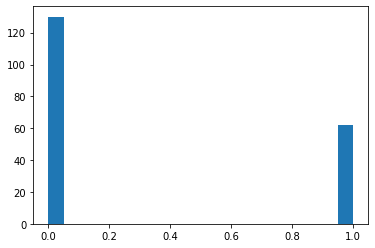

0    130
1     62
Name: Outcome, dtype: int64

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(y_test, bins=20)
plt.show()

y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

# Intro to Confusion Matrix
A confusion matrix is a table that is used to describe teh performance of a classifier on a set of test data where we know the true values. Essentially, we use it to check how well our classifier's predicted values matched against the known values of the same data.
The confusion matrix is a 2x2 matrix, but it includes important terminology:
* True Positives (TP): we correctly predicted a positive outcome (i.e someone has diabetes, and we correctly predicted it)
* True Negatives (TN): we correctly predicted a negative outcome (i.e someone does not have diabetes, adn we correctly predicted it)
* False Positives (FP): we incorrectly predicted the outcome (i.e someone does not have diabetes, but we predicted that they did)
* False Negatives (FN): we incorrectly predicted negative outcomes (i.e someone has diabetes, and we incorrectly said that they do not)

## Activity: Write a function that calculates:

- How many of 0 (no diabetes) in y_test is predicted correctly as 0 (no diabetes) in y_pred?

- How many of 0 (no diabetes) in y_test is predicted incorrectly as 1 (diabetes) in y_pred?

- How many of 1 (diabetes) in y_test is predicted incorrectly as 0 (no diabetes) in y_pred?

- How many of 1 (diabetes) in y_test is predicted correctly 1 (diabetes) in y_pred?


In [71]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    
    # create a blank 2x2 confusion matrix (all 0's)
    conf_matrix  = np.zeros((2, 2))
    
    # indicies that will create all confusion matrix values
    # TP (1,1), TN(0,0), FP (0,1), FN (1,0)
    for row_index in [0, 1]:
        for column_index in [0, 1]:
            counter = 0
            
            # iterate through all elements in y_test, y_pred,
            # which are all the values are either 0 or 1
            for (i, j) in zip(y_test, y_predict):
                if (i == m) & (j == n):
                        counter += 1
                        
            # add the total number of elements for the confusion matrix value,
            # then look at the next value in the loop
            conf_matrix[m, n] = counter
    return conf_matrix

print(comp_yt_yp(y_test, y_pred))

[[118.  12.]
 [ 47.  15.]]


In [76]:
# Step 1: create a function that compares the y's
# return how many 0's in y_test and y_pred
# this is an element-wise comparison

def compare_ys(y_test, y_pred, value_of_y_test, value_of_y_pred):
    counter = 0
    for (i,j) in zip(y_test, y_pred):    # element-wise comparison
        if (i == value_of_y_test) and (j == value_of_y_pred):
            counter += 1
    return counter

print(compare_ys(y_test, y_pred, 0, 0)) # TN
print(compare_ys(y_test, y_pred, 0, 1)) # FN
print(compare_ys(y_test, y_pred, 1, 1)) # TP
print(compare_ys(y_test, y_pred, 1, 0)) # FP

118
12
15
47


### Basic terminology

True Positives (TP): we correctly predicted that they do have diabetes: 15

True Negatives (TN): we correctly predicted that they don't have diabetes: 118

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error"): 12

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error"): 47

<img src="Images/confusion_matrix.png" width="500" height="500">

* TP (1,1)
* TN(0,0)
* FP (0,1)
* FN (1,0)
* the size of the y_pred is the addition of the Predicted columns

In [78]:
# easier way to compute using confusion matrix:

from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[118  12]
 [ 47  15]]


## Activity: Apply these two methods to the dataset
After logreg.fit(X_train, y_train), call the trained model using:
* logreg.predict(X_test)
* logreg.predict_prob(X_test)

In [86]:
logreg.classes_

array([0, 1])

In [84]:
logreg.predict(X_test)

logreg.predict_proba(X_test)*100

array([[63.24757092, 36.75242908],
       [71.64365619, 28.35634381],
       [71.10411411, 28.89588589],
       [58.58938004, 41.41061996],
       [84.10397342, 15.89602658],
       [82.93484366, 17.06515634],
       [50.11097426, 49.88902574],
       [48.65845916, 51.34154084],
       [72.32138753, 27.67861247],
       [32.81056232, 67.18943768],
       [64.24444286, 35.75555714],
       [25.912035  , 74.087965  ],
       [63.94976511, 36.05023489],
       [76.98763682, 23.01236318],
       [57.345769  , 42.654231  ],
       [80.89648472, 19.10351528],
       [54.23639908, 45.76360092],
       [88.09858965, 11.90141035],
       [56.07104651, 43.92895349],
       [63.03884878, 36.96115122],
       [55.81201142, 44.18798858],
       [62.38833784, 37.61166216],
       [80.18397849, 19.81602151],
       [58.32269592, 41.67730408],
       [84.45171903, 15.54828097],
       [74.68329032, 25.31670968],
       [90.25692295,  9.74307705],
       [30.36628834, 69.63371166],
       [84.64169098,

### Subject 1:
* [63.24757092, 36.75242908]
* 63% doesn't have diabetes and is okay
* 36% does have diabetes and is not okay


In [88]:
# the 8th and 10th subject have diabetes (1) the others do not (0)
print(logreg.predict(X_test[0:10]))

[0 0 0 0 0 0 0 1 0 1]
